In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "scenery.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

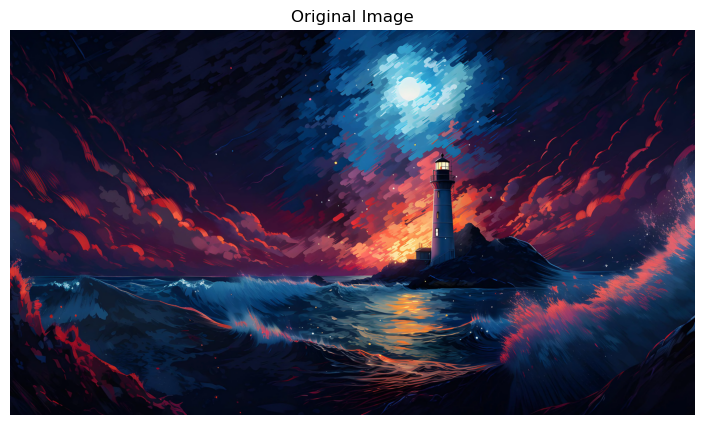

In [5]:
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")
plt.show()

In [6]:
height, width, channels = image.shape
print(f"Image Dimensions: {height}x{width}, Channels: {channels}")


Image Dimensions: 2160x3840, Channels: 3


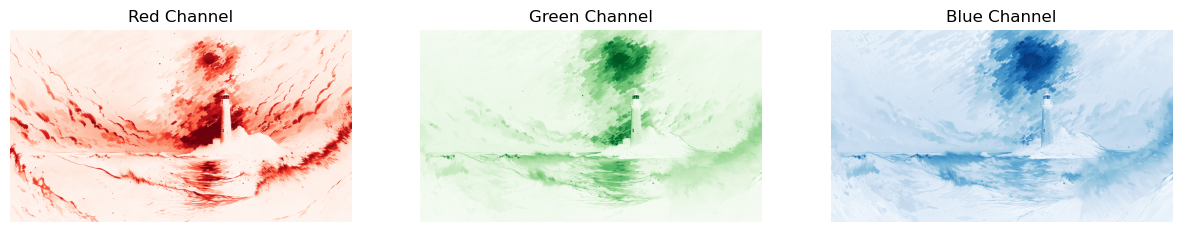

In [7]:
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(R, cmap="Reds"); ax[0].set_title("Red Channel")
ax[1].imshow(G, cmap="Greens"); ax[1].set_title("Green Channel")
ax[2].imshow(B, cmap="Blues"); ax[2].set_title("Blue Channel")
for a in ax: a.axis("off")
plt.show()

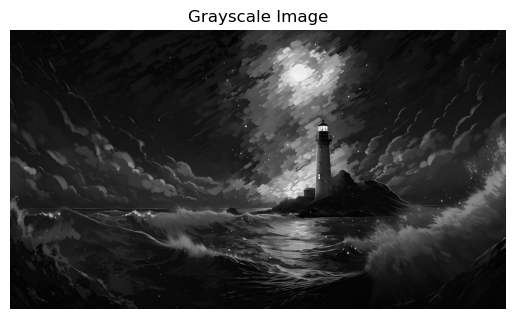

In [8]:
gray_image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

plt.imshow(gray_image, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

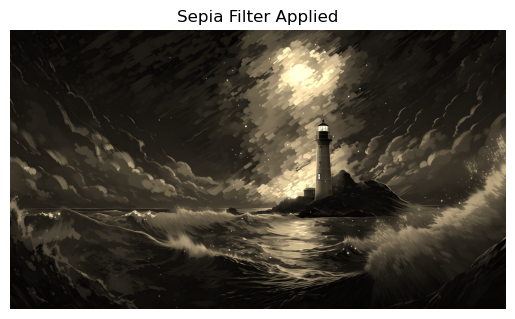

In [9]:
sepia_matrix = np.array([
    [0.393, 0.769, 0.189],
    [0.349, 0.686, 0.168],
    [0.272, 0.534, 0.131]
])

sepia_image = np.dot(image, sepia_matrix.T)
sepia_image = np.clip(sepia_image, 0, 255).astype(np.uint8)

plt.imshow(sepia_image)
plt.title("Sepia Filter Applied")
plt.axis("off")
plt.show()

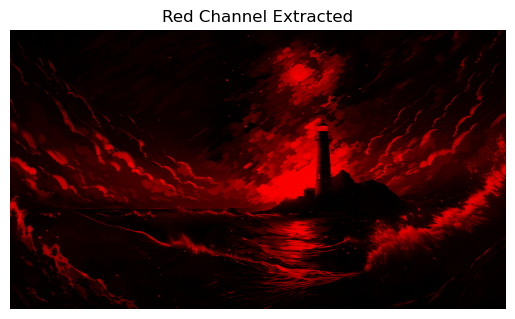

In [10]:
red_only = image.copy()
red_only[:, :, 1:] = 0

plt.imshow(red_only)
plt.title("Red Channel Extracted")
plt.axis("off")
plt.show()

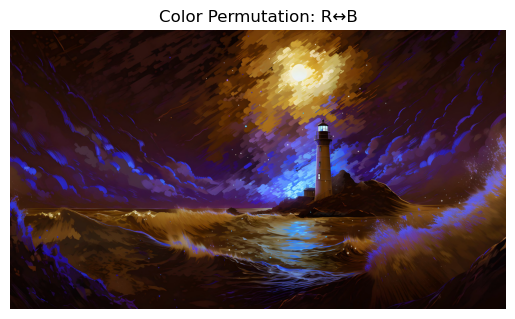

In [11]:
permute_image = image.copy()
permute_image[:, :, [0, 2]] = permute_image[:, :, [2, 0]]

plt.imshow(permute_image)
plt.title("Color Permutation: R↔B")
plt.axis("off")
plt.show()

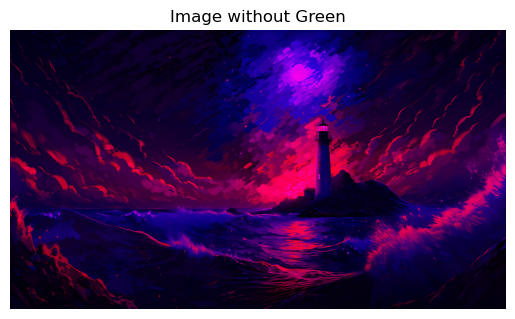

In [12]:
no_green = image.copy()
no_green[:, :, 1] = 0

plt.imshow(no_green)
plt.title("Image without Green")
plt.axis("off")
plt.show()

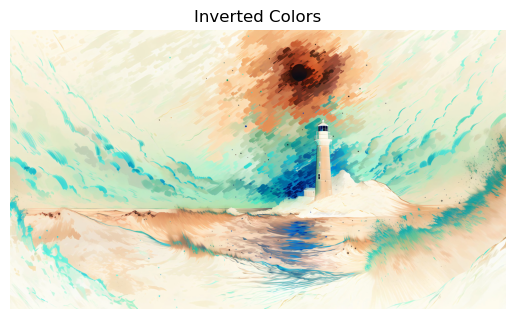

In [13]:
inverted_image = 255 - image

plt.imshow(inverted_image)
plt.title("Inverted Colors")
plt.axis("off")
plt.show()

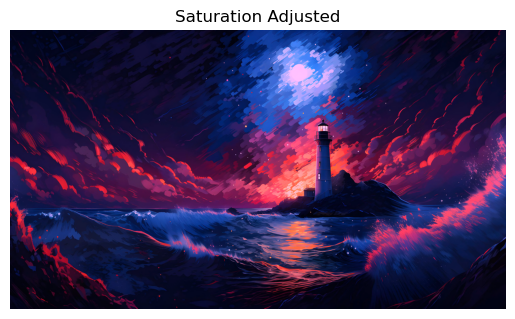

In [14]:
saturation_image = image.copy().astype(np.float32)
saturation_image[:, :, 0] *= 1.2
saturation_image[:, :, 2] *= 1.2
saturation_image[:, :, 1] *= 0.8
saturation_image = np.clip(saturation_image, 0, 255).astype(np.uint8)

plt.imshow(saturation_image)
plt.title("Saturation Adjusted")
plt.axis("off")
plt.show()

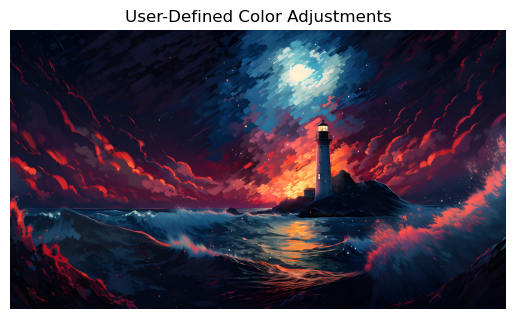

In [15]:
user_matrix = np.array([
    [1.1, 0.1, 0.0],
    [0.0, 1.0, 0.0],
    [0.0, 0.0, 0.9]
])

user_adjusted = np.dot(image, user_matrix.T)
user_adjusted = np.clip(user_adjusted, 0, 255).astype(np.uint8)

plt.imshow(user_adjusted)
plt.title("User-Defined Color Adjustments")
plt.axis("off")
plt.show()

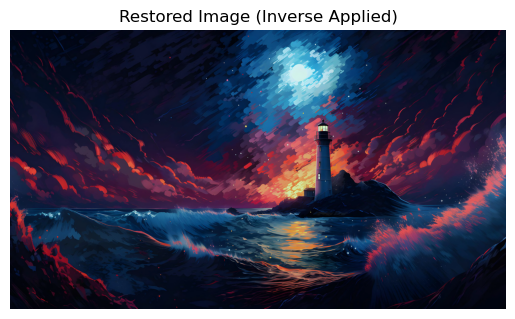

In [16]:
try:
    inverse_matrix = np.linalg.inv(user_matrix)
    restored_image = np.dot(user_adjusted, inverse_matrix.T)
    restored_image = np.clip(restored_image, 0, 255).astype(np.uint8)

    plt.imshow(restored_image)
    plt.title("Restored Image (Inverse Applied)")
    plt.axis("off")
    plt.show()
except np.linalg.LinAlgError:
    print("Matrix inversion failed")

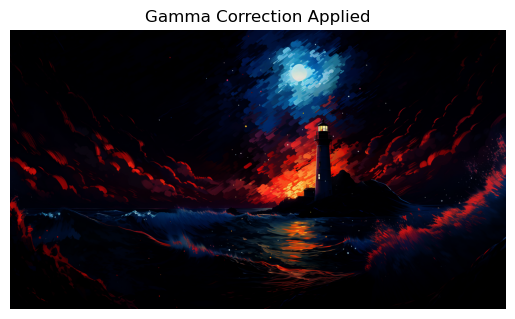

In [17]:
gamma = 2.2
gamma_corrected = np.power(image / 255.0, gamma) * 255.0
gamma_corrected = np.clip(gamma_corrected, 0, 255).astype(np.uint8)

plt.imshow(gamma_corrected)
plt.title("Gamma Correction Applied")
plt.axis("off")
plt.show()